In [13]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
#! pip install sodapy

import pandas as pd
import numpy as np
from sodapy import Socrata
import datetime as date
import matplotlib.pyplot as plt
import seaborn as sns


client = Socrata("healthdata.gov", None)
results = client.get("g62h-syeh", limit = 48000)
results_df = pd.DataFrame.from_records(results)

results_df = results_df.sort_values('date',ascending=False)
results_df['date'] = results_df['date'].astype('datetime64')



1 - ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo).

In [3]:
punto1 = results_df[['state', 
                     'date', 
                     'total_pediatric_patients_hospitalized_confirmed_covid', 
                     'total_adult_patients_hospitalized_confirmed_covid']]

punto1 = punto1[(punto1['date'] <= '2020-06-30')]

punto1.fillna(0,inplace=True)

punto1['total_adult_patients_hospitalized_confirmed_covid'] = punto1['total_adult_patients_hospitalized_confirmed_covid'].astype('int')
punto1['total_pediatric_patients_hospitalized_confirmed_covid'] = punto1['total_pediatric_patients_hospitalized_confirmed_covid'].astype('int')

punto1['total_pacientes_hospitalizados'] = punto1['total_adult_patients_hospitalized_confirmed_covid'] + punto1['total_pediatric_patients_hospitalized_confirmed_covid']

punto1 = punto1[punto1['total_pacientes_hospitalizados'] != 0]

punto1 = punto1.drop('date',axis=1)
punto1 = punto1.drop('total_pediatric_patients_hospitalized_confirmed_covid',axis=1)
punto1 = punto1.drop('total_adult_patients_hospitalized_confirmed_covid', axis=1)

punto1 = punto1.groupby('state').sum()

final1 = punto1.sort_values('total_pacientes_hospitalizados',ascending=False)

final1.head()

,total_pacientes_hospitalizados
state,
LA,40452
CA,36134
NV,20134
AZ,5177
IA,3174


2 - Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena establecida e indique:

.Intervalos de crecimiento y decrecimiento

.Puntos críticos (mínimos y máximos)

el primer intervalo de crecimiento comienza el 15886   2020-03-14
Name: date, dtype: datetime64[ns]  hasta el    13341   2020-04-14
Name: date, dtype: datetime64[ns]
el primer intervalo de decrecimiento comienza el 13341   2020-04-14
Name: date, dtype: datetime64[ns]    hasta el     10817   2020-09-20
Name: date, dtype: datetime64[ns]
el segundo intervalo de crecimiento comienza el 10817   2020-09-20
Name: date, dtype: datetime64[ns]   hasta el   38432   2021-01-19
Name: date, dtype: datetime64[ns]
el segundo intervalo de decrecimiento comienza el 38432   2021-01-19
Name: date, dtype: datetime64[ns]    hasta el     41796   2021-03-01
Name: date, dtype: datetime64[ns]


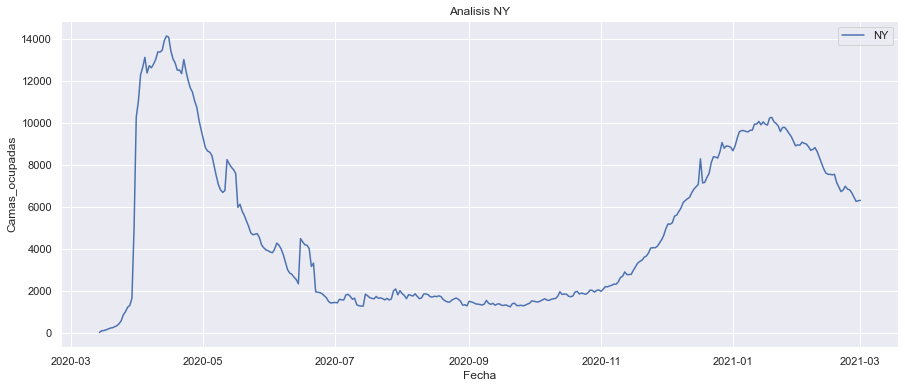

       inpatient_beds_used_covid
state                           
NY                       1716755
el maximo es               14126
el minimo es               6


In [3]:
punto2 = results_df[['state','date','inpatient_beds_used_covid']]

punto2 = punto2[(punto2['date'] <= '2021-03-01')]
punto2 = punto2[(punto2['date'] >= '2020-03-08')]

punto2 = punto2[punto2['state'] == 'NY']

punto2['inpatient_beds_used_covid'] = punto2['inpatient_beds_used_covid'].astype('int')

''' intervalos'''

intervalos = punto2.sort_values('inpatient_beds_used_covid',ascending=False)
#intervalos = intervalos[intervalos['inpatient_beds_used_covid'] != 0]

int1 = intervalos[(intervalos['date'] <= '2020-08-01')]
int1 = int1[(int1['date'] >= '2020-03-01')]
int2 = intervalos[(intervalos['date'] <= '2021-03-01')]
int2 = int2[(int2['date'] >= '2020-08-01')]
int3 = intervalos[(intervalos['date'] >= '2021-03-01')]

'''imprime la descripcion de los intervalos'''

print ('el primer intervalo de crecimiento comienza el ' + str(int1['date'].tail(1)) + '  hasta el    ' + str(int1['date'].head(1)))
print ('el primer intervalo de decrecimiento comienza el ' + str(int1['date'].head(1)) + '    hasta el     ' + str(int2['date'].tail(1)))
print ('el segundo intervalo de crecimiento comienza el ' + str(int2['date'].tail(1)) + '   hasta el   ' + str(int2['date'].head(1)))
print ('el segundo intervalo de decrecimiento comienza el ' + str(int2['date'].head(1)) + '    hasta el     ' + str(int3['date'].head(1)))

'''grafica'''

sns.set()

y = punto2['inpatient_beds_used_covid']
x = punto2['date']

plt.plot(x,y)
plt.xlabel('Fecha')
plt.ylabel('Camas_ocupadas')
plt.title('Analisis NY')

plt.legend(labels=['NY'])
plt.gcf().set_size_inches(15, 6)
plt.show()

''' cantidad total de ocupacion de camas'''

final2 = punto2.drop('date',axis=1)

final2 = final2.groupby('state').sum()

'''respuestas'''

print (final2)
print ('el maximo es               ' + str(punto2['inpatient_beds_used_covid'].max()))
print ('el minimo es               ' + str(punto2['inpatient_beds_used_covid'].min()))

3 - ¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020? La medición debe realizarse en términos absolutos.

In [4]:
punto3 = results_df[['state','date','total_staffed_adult_icu_beds']]

punto3 = punto3[(punto3['date'] <= '2020-12-31')]

punto3.fillna(0,inplace=True)

punto3 = punto3[punto3['total_staffed_adult_icu_beds'] != 0]

punto3['total_staffed_adult_icu_beds'] = punto3['total_staffed_adult_icu_beds'].astype('int')

punto3 = punto3.drop('date',axis=1)

punto3 = punto3.groupby('state').sum()
 
final3 = punto3.sort_values('total_staffed_adult_icu_beds',ascending=False)

final3.head()


,total_staffed_adult_icu_beds
state,
CA,1228347
TX,1186925
FL,1025251
NY,856663
OH,650044


4 - ¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?

In [5]:
punto4 = results_df[['state',
                    'date',
                    'staffed_icu_pediatric_patients_confirmed_covid',
                    'total_pediatric_patients_hospitalized_confirmed_covid']]

punto4 = punto4[(punto4['date'] <= '2020-12-31')]

punto4.fillna(0,inplace=True)

punto4['staffed_icu_pediatric_patients_confirmed_covid'] = punto4['staffed_icu_pediatric_patients_confirmed_covid'].astype('int')
punto4['total_pediatric_patients_hospitalized_confirmed_covid'] = punto4['total_pediatric_patients_hospitalized_confirmed_covid'].astype('int')

punto4 = punto4.drop('date',axis=1)

punto4 = punto4.groupby('state').sum()

punto4['total_pediatricos_internados'] = punto4['staffed_icu_pediatric_patients_confirmed_covid'] + punto4['total_pediatric_patients_hospitalized_confirmed_covid']

punto4

,staffed_icu_pediatric_patients_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid,total_pediatricos_internados
state,,,
AK,38,351,389
AL,39,2966,3005
AR,406,1513,1919
AZ,625,5762,6387
CA,989,10012,11001
CO,191,3296,3487
CT,11,598,609
DC,245,934,1179
DE,2,538,540


5 - ¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.

In [6]:
punto5 = results_df[['state',
                    'date',
                    'staffed_icu_adult_patients_confirmed_covid',
                    'staffed_icu_pediatric_patients_confirmed_covid',
                    'total_staffed_pediatric_icu_beds',
                    'total_staffed_adult_icu_beds']]

punto5 = punto5[(punto5['date'] <= '2022-08-01')]

punto5.fillna(0,inplace=True)

punto5['staffed_icu_adult_patients_confirmed_covid'] = punto5['staffed_icu_adult_patients_confirmed_covid'].astype('int')
punto5['staffed_icu_pediatric_patients_confirmed_covid'] = punto5['staffed_icu_pediatric_patients_confirmed_covid'].astype('int')
punto5['total_staffed_pediatric_icu_beds'] = punto5['total_staffed_pediatric_icu_beds'].astype('int')
punto5['total_staffed_adult_icu_beds'] = punto5['total_staffed_adult_icu_beds'].astype('int')

punto5['total_camas_uci_ocupadas'] = punto5['staffed_icu_adult_patients_confirmed_covid'] + punto5['staffed_icu_pediatric_patients_confirmed_covid']
punto5['total_camas_uci'] = punto5['total_staffed_pediatric_icu_beds'] + punto5['total_staffed_adult_icu_beds']

punto5 = punto5.drop('date',axis=1)
punto5 = punto5.drop('staffed_icu_adult_patients_confirmed_covid',axis=1)
punto5 = punto5.drop('staffed_icu_pediatric_patients_confirmed_covid',axis=1)
punto5 = punto5.drop('total_staffed_pediatric_icu_beds',axis=1)
punto5 = punto5.drop('total_staffed_adult_icu_beds',axis=1)

punto5['total_camas_uci_ocupadas'] = punto5['total_camas_uci_ocupadas'].astype('int')
punto5['total_camas_uci'] = punto5['total_camas_uci'].astype('int')

punto5 = punto5.groupby('state').sum()

punto5['porcentaje_ocupacion_camas_uci_covid'] = round((punto5['total_camas_uci_ocupadas']*100)/punto5['total_camas_uci'],2)

punto5

,total_camas_uci_ocupadas,total_camas_uci,porcentaje_ocupacion_camas_uci_covid
state,,,
AK,11321,129650,8.73
AL,219112,1182409,18.53
AR,141179,970190,14.55
AS,2,2400,0.08
AZ,239038,1651058,14.48
CA,903866,7302962,12.38
CO,148905,1207197,12.33
CT,59663,934482,6.38
DC,21907,309458,7.08


6 - ¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?

In [26]:
punto6 = results_df[['state',
                    'date', 
                    'deaths_covid']]

punto6 = punto6[(punto6['date'] <= '2021-12-31')]
punto6 = punto6[(punto6['date'] >= '2021-01-01')]

punto6.fillna(0,inplace=True)

punto6['deaths_covid'] = punto6['deaths_covid'].astype('int')

punto6 = punto6.drop('date',axis=1)

punto6 = punto6.groupby('state').sum()

punto6.sort_values('deaths_covid', ascending=False)

,deaths_covid
state,
CA,35108
TX,32889
FL,26004
NY,17620
AZ,16250
PA,13363
GA,12338
OH,12023
NC,10922


7 - ¿Qué relación presenta la falta de personal médico, con la cantidad de muertes por covid durante el año 2021?

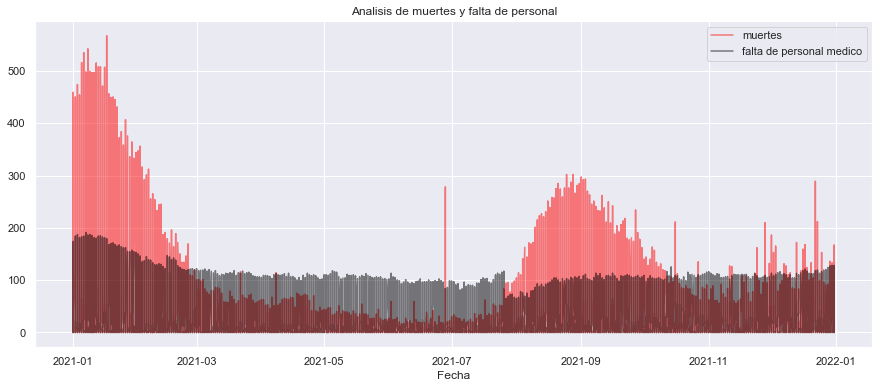

In [8]:
punto7 = results_df[['state',
                    'date',
                    'critical_staffing_shortage_today_yes',
                    'deaths_covid']]

punto7 = punto7[(punto7['date'] <= '2021-12-31')]
punto7 = punto7[(punto7['date'] >= '2021-01-01')]

punto7['critical_staffing_shortage_today_yes'] = punto7['critical_staffing_shortage_today_yes'].astype('int')
punto7['deaths_covid'] = punto7['deaths_covid'].astype('int')

sns.set()
fig = plt.figure()
ax = plt.axes()
y_dt = punto7['deaths_covid']
y_stf = punto7['critical_staffing_shortage_today_yes']
x = punto7['date']

plt.plot(x,y_dt,color='red',alpha=0.5)
plt.plot(x,y_stf,color='black',alpha=0.5)
plt.xlabel('Fecha')
plt.title('Analisis de muertes y falta de personal')
plt.gcf().set_size_inches(15, 6)
plt.legend(labels=['muertes','falta de personal medico'])

plt.show()


8 - Siguiendo las respuestas anteriores, ¿cuál fue el peor mes de la pandemia para USA en su conjunto? Puede utilizar otras medidas que considere necesarias.

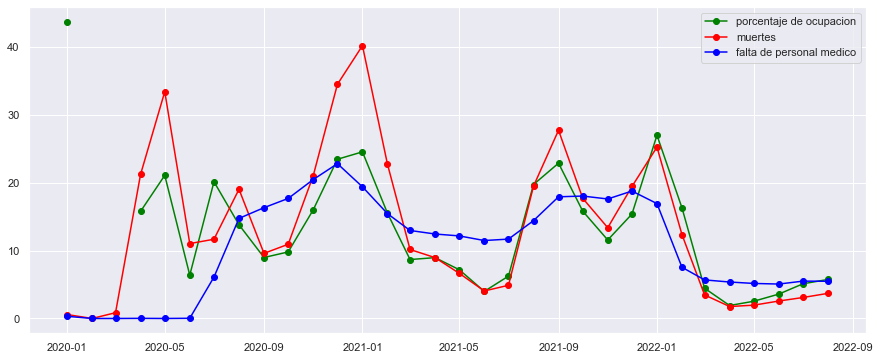

In [9]:
punto8 = results_df[['state',
                     'date',
                     'critical_staffing_shortage_today_yes',
                     'deaths_covid',
                     'staffed_icu_adult_patients_confirmed_covid',
                     'staffed_icu_pediatric_patients_confirmed_covid',
                     'total_staffed_pediatric_icu_beds',
                     'total_staffed_adult_icu_beds']]

punto8 = punto8[(punto8['date'] <= '2022-08-01')]

punto8.fillna(0,inplace=True)

punto8['staffed_icu_adult_patients_confirmed_covid'] = punto8['staffed_icu_adult_patients_confirmed_covid'].astype('int')
punto8['staffed_icu_pediatric_patients_confirmed_covid'] = punto8['staffed_icu_pediatric_patients_confirmed_covid'].astype('int')
punto8['critical_staffing_shortage_today_yes'] = punto8['critical_staffing_shortage_today_yes'].astype('int')
punto8['deaths_covid'] = punto8['deaths_covid'].astype('int')
punto8['total_staffed_pediatric_icu_beds'] = punto8['total_staffed_pediatric_icu_beds'].astype('int')
punto8['total_staffed_adult_icu_beds'] = punto8['total_staffed_adult_icu_beds'].astype('int')

punto8['total_camas_uci_ocupadas'] = punto8['staffed_icu_adult_patients_confirmed_covid'] + punto8['staffed_icu_pediatric_patients_confirmed_covid']
punto8['total_camas_uci'] = punto8['total_staffed_pediatric_icu_beds'] + punto8['total_staffed_adult_icu_beds']

punto8 = punto8.drop('staffed_icu_adult_patients_confirmed_covid',axis=1)
punto8 = punto8.drop('staffed_icu_pediatric_patients_confirmed_covid',axis=1)


punto8['total_camas_uci_ocupadas'] = punto8['total_camas_uci_ocupadas'].astype('int')

punto8 = round(punto8.groupby(pd.PeriodIndex(punto8['date'],freq='M'),axis=0).mean(),2)

punto8['porcentaje_ocupacion_camas_uci_covid'] = round((punto8['total_camas_uci_ocupadas']*100)/punto8['total_camas_uci'],2)

punto8 = punto8.drop('total_staffed_pediatric_icu_beds',axis=1)
punto8 = punto8.drop('total_staffed_adult_icu_beds',axis=1)
punto8 = punto8.drop('total_camas_uci_ocupadas',axis=1)
punto8 = punto8.drop('total_camas_uci',axis=1)

punto8 = punto8.reset_index()

punto8['date'] = punto8['date'].astype('datetime64')

fig = plt.figure()
ax = plt.axes()

y_dt = punto8['deaths_covid']
y_stf = punto8['critical_staffing_shortage_today_yes']
y_bd = punto8['porcentaje_ocupacion_camas_uci_covid']
x = punto8['date']

ax.set_xscale('linear')
ax.plot(x, y_bd, marker="o", color = 'green')
ax.plot(x, y_dt, marker="o", color = 'red')
ax.plot(x,y_stf,marker= 'o', color= 'blue')

plt.legend(labels=['porcentaje de ocupacion','muertes','falta de personal medico'])
plt.gcf().set_size_inches(15, 6)
plt.show()

9 - ¿Qué recomendaciones haría, ex post, con respecto a los recursos hospitalarios y su uso?

Recomendaria:

                * Reorganizar los servicios de salud y planificar al aumento de la fuerza laboral.
                * Mantener la prevencion y el control de infecciones en todos los servicios de salud.
                * Optimizar el manejo clinico a lo largo de una atencion continua.
                * Asegurar la cadena de suministro.